In [83]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [14]:
input_file = "12_input.txt"

In [202]:
def load_graph(grid):
    start = np.where(grid == ord('S'))
    end = np.where(grid == ord('E'))
    grid[start] = ord('a')
    grid[end] = ord('z')
    
    gridgraph = nx.DiGraph() 
    for (x, y), h in np.ndenumerate(grid):
        gridgraph.add_node((x, y), height=h)
    
    for (x, y), val in np.ndenumerate(np.diff(grid, axis=1) <= 1):
        if val:
            gridgraph.add_edge((x, y), (x, y+1))
    for (x, y), val in np.ndenumerate(np.diff(grid, axis=1) >= -1):
        if val:
            gridgraph.add_edge((x, y+1), (x, y))
    for (x, y), val in np.ndenumerate(np.diff(grid, axis=0) <= 1):
        if val:
            gridgraph.add_edge((x, y), (x+1, y))
    for (x, y), val in np.ndenumerate(np.diff(grid, axis=0) >= -1):
        if val:
            gridgraph.add_edge((x+1, y), (x, y))
    return gridgraph

In [203]:
with open(input_file) as f:
    grid = np.array([list(map(ord, line.rstrip())) for line in f])

start = np.where(grid == ord('S'))
start = (start[0][0], start[1][0])
end = np.where(grid == ord('E'))
end = (end[0][0], end[1][0])

In [204]:
gridgraph = load_graph(grid)
shortpath = nx.shortest_path(gridgraph, source=start, target=end)

#part1
print(len(shortpath)-1)

456


In [226]:
#part2
starts = [node for node, attr in gridgraph.nodes(data=True) if attr["height"] == ord('a') and nx.has_path(gridgraph, source=node, target=end)]
lengths = [len(nx.shortest_path(gridgraph, source=st, target=end))-1 for st in starts]
print(min(lengths))

454


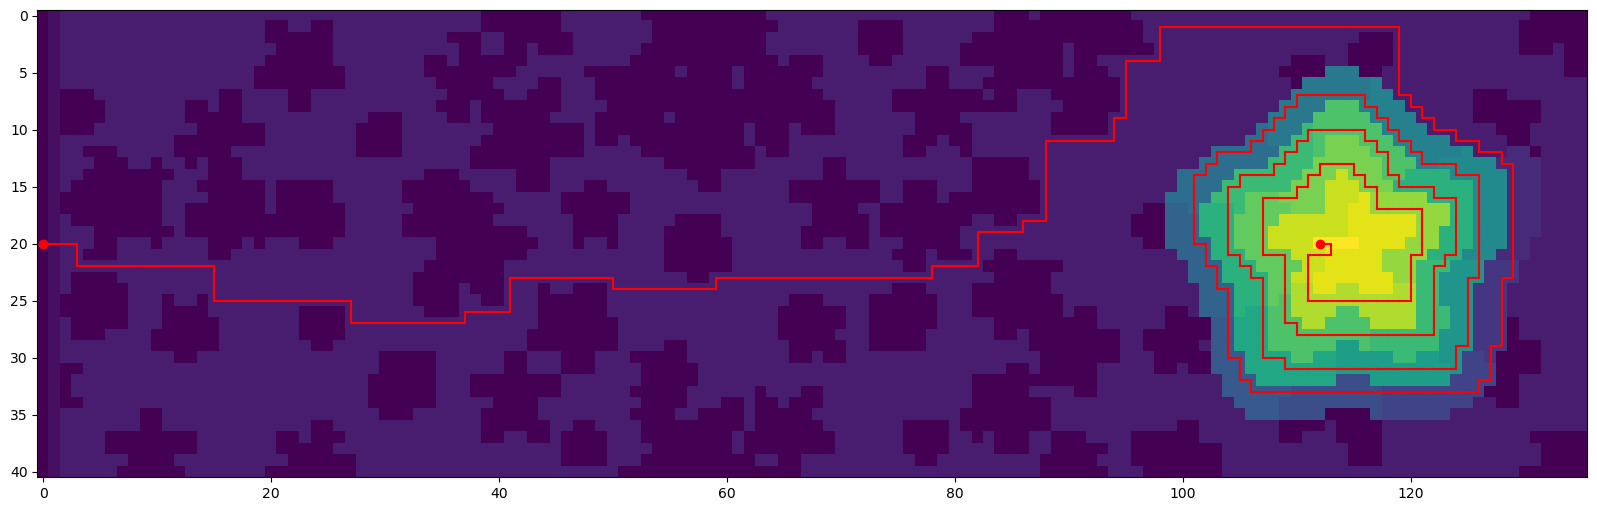

In [195]:
horiz_path = np.abs(np.diff(grid, axis=1)) <= 1
vert_path = np.abs(np.diff(grid, axis=0)) <= 1

fig, ax = plt.subplots(figsize=(20,8))

mappa = ax.imshow(grid)

for k, (y, x) in enumerate(shortpath[:-1]):
    ax.plot([x, shortpath[k+1][1]],[y, shortpath[k+1][0]], 'r')
# for (y, x), val in np.ndenumerate(horiz_path):
#     if val:
#         ax.plot([x, x+1], [y, y], 'k')
# for (y, x), val in np.ndenumerate(vert_path):
#     if val:
#         ax.plot([x, x], [y, y+1], 'k')

ax.plot(start[1], start[0], 'ro')
ax.plot(end[1], end[0], 'ro')